<a href="https://colab.research.google.com/github/suvrashaw/Intern-Work/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Importing all the necessary Libraries`


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

`Loading the Dataset`

In [2]:
df = pd.read_csv('Dataset.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# to display no. of samples on each class
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

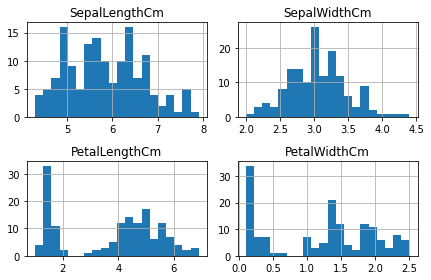

In [8]:
# histograms

df.hist(bins = 20)
plt.tight_layout()
plt.show()

**Correlation Matrix**

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1.

 If two varibles have high correlation, we can neglect one variable from those two.

In [9]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


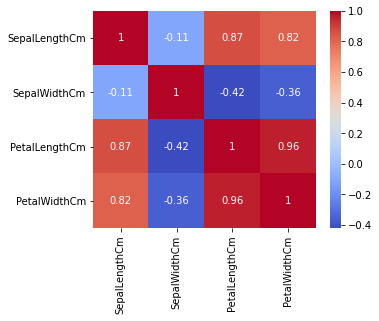

In [10]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

**Label Encoder**


In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers.


 Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Model Training**

In [12]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

Logistic Regression

In [13]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [14]:
# model training
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


Decision Tree Classifier

In [16]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
m = DecisionTreeClassifier()

In [17]:
m.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
# print metric to get performance
print("Accuracy: ",m.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


K NeighborsClassifier

In [19]:
accuracy_rate = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

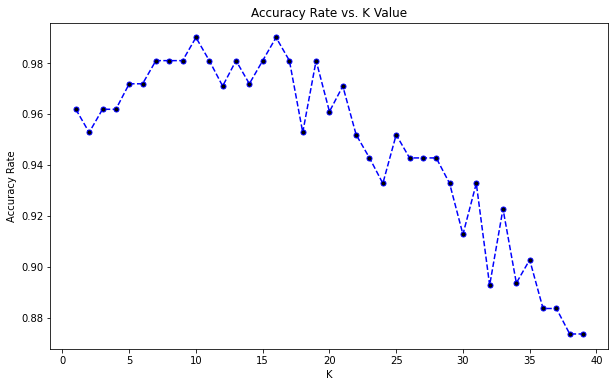

In [20]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='.',
         markerfacecolor='black', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')


In [21]:
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))
print(metrics.accuracy_score(y_pred, y_test))

WITH K=1


[[17  0  0]
 [ 0 12  1]
 [ 0  0 15]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.92      0.96        13
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777


SVM Classifier with Linear Kernel

In [22]:
#Create the SVM model
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'linear', random_state = 0)
#Fit the model for the data

classifier1.fit(x_train, y_train)

#Make the prediction
y_pred = classifier1.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[17  0  0]
 [ 0 12  1]
 [ 0  0 15]]
Accuracy: 98.18 %
Standard Deviation: 3.64 %


SVM Classifier with RBF Kernel

In [24]:
#Create the SVM model
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'rbf', random_state = 0)
#Fit the model for the data

classifier2.fit(x_train, y_train)

#Make the prediction
y_pred = classifier2.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[17  0  0]
 [ 0 11  2]
 [ 0  0 15]]
Accuracy: 98.09 %
Standard Deviation: 3.82 %


SVM Classifier with Polynomial Kernel

In [26]:
#Create the SVM model
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'poly', random_state = 0)
#Fit the model for the data

classifier3.fit(x_train, y_train)

#Make the prediction
y_pred = classifier3.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier3, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[17  0  0]
 [ 0 11  2]
 [ 0  0 15]]
Accuracy: 97.18 %
Standard Deviation: 4.31 %


In [28]:
import pickle
pickle.dump(model, open("iri.pkl", "wb"))